In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.externals import joblib

from sklearn.metrics import confusion_matrix

C:\Users\Shree\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from sklearn.ensemble import VotingClassifier

In [3]:
train = pd.read_csv("UNSW_NB15_training-set.csv")

In [4]:
test = pd.read_csv("UNSW_NB15_testing-set.csv")

In [5]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,1,0,0,0,1,1,0,Normal
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,1,2,0,0,0,1,6,0,Normal
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,1,3,0,0,0,2,6,0,Normal
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,1,3,1,1,0,2,1,0,Normal
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,2,1,40,0,0,0,2,39,0,Normal


In [6]:
print(train.groupby('attack_cat').size())

attack_cat
Analysis           2000
Backdoor           1746
DoS               12264
Exploits          33393
Fuzzers           18184
Generic           40000
Normal            56000
Reconnaissance    10491
Shellcode          1133
Worms               130
dtype: int64


C:\Users\Shree\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


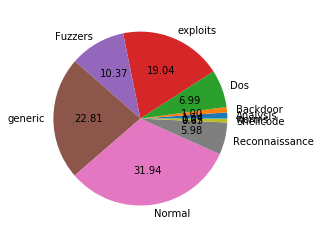

In [7]:
sizes = [2000, 1746, 12264, 33393,18184,40000,56000,10491,1133,130]
labels = ["Analysis", "Backdoor", "Dos", "exploits","Fuzzers","generic","Normal","Reconnaissance","Shellcode","worms"]

plt.pie(sizes, labels = labels, autopct = "%.2f")
plt.axes().set_aspect("equal")
plt.rcParams["figure.figsize"] = (15, 12)

plt.show()

In [8]:
y=train.attack_cat
train=train.drop("attack_cat",axis=1)
#train.head()


In [9]:
dummyy=pd.get_dummies(y,drop_first=True)

In [10]:
dummyy.head()

,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0


In [11]:
#test.head()

In [12]:
#train.info()

In [13]:
#test.info()

In [14]:
#train.isnull().sum()

In [15]:
#test.isnull().sum()

In [16]:
#allcorr = train.corr()
#allcorr.style.background_gradient()

In [17]:
frame = [train,test]

In [18]:
all_data = pd.concat(frame,axis=0)

In [19]:
#all_data.info()

In [20]:
#all_data.isnull().sum()

In [21]:
cat = all_data.select_dtypes(include=['object']).columns
name=[]
for i in cat:
    name.append(i)

In [22]:
non_cat=all_data.drop(name,axis=1)
cat_data=all_data.drop(non_cat,axis=1)


In [23]:
cat_data.head()

,proto,service,state
0,tcp,-,FIN
1,tcp,-,FIN
2,tcp,-,FIN
3,tcp,ftp,FIN
4,tcp,-,FIN


In [24]:
dummy=pd.get_dummies(cat_data,drop_first=True)

In [25]:
cat_data.head()

,proto,service,state
0,tcp,-,FIN
1,tcp,-,FIN
2,tcp,-,FIN
3,tcp,ftp,FIN
4,tcp,-,FIN


In [25]:
frame2=[dummy,non_cat]
Final=pd.concat(frame2,axis=1)

In [26]:
train = Final.iloc[:175341,:]

In [27]:
test = Final.iloc[175341:,:]

In [28]:
#train.info()

In [29]:
#test.info()

In [30]:
#train.head()

In [31]:
#y.head()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(train,y,test_size=0.30, random_state=42)

In [34]:
# scaling the data sets 

In [35]:
#from sklearn.preprocessing import StandardScaler

In [36]:
#std_X= StandardScaler()

In [37]:
#X_train =std_X.fit_transform(X_train)

In [38]:
#X_test =std_X.transform(X_test)

In [39]:
# 1 random forest classification

In [40]:
from sklearn.ensemble import RandomForestClassifier
reg=RandomForestClassifier(n_estimators=100)

In [41]:
reg.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
reg.score(X_train,y_train)

0.9999592628199906

In [43]:
reg.score(X_test,y_test)

0.8484306978689429

In [44]:
pred_reg = reg.predict(X_test)
print(pred_reg)

['Normal' 'Generic' 'Exploits' ... 'Fuzzers' 'Normal' 'Fuzzers']


In [45]:
from sklearn.metrics import accuracy_score

# Evaluate accuracy
print(accuracy_score(y_test, pred_reg))

0.8484306978689429


In [46]:
# conffusion matrix 

In [47]:
labels= ['Normal','Backdoor','Analysis','Fuzzers','Shellcode','Reconnaissance',
 'Exploits','DoS','Worms','Generic']
confusion_matrix(y_test,pred_reg, labels=['Normal','Backdoor','Analysis','Fuzzers','Shellcode','Reconnaissance',
 'Exploits','DoS','Worms','Generic'])

array([[16121,     0,     3,   582,     4,     7,    55,     0,     0,
            0],
       [    0,    92,    35,    21,     3,    76,   154,   140,     0,
            8],
       [   21,    34,   128,    52,     0,    11,   161,   186,     0,
            5],
       [  108,    27,    58,  4712,    27,    76,   197,   174,     0,
            3],
       [    1,     0,     0,    82,   228,     6,    44,     7,     0,
            0],
       [    0,    97,    15,    69,     2,  2357,   327,   246,     0,
            2],
       [    4,   104,   139,   261,    35,   289,  7892,  1406,     1,
           27],
       [    1,   137,   172,   175,    21,   178,  1588,  1277,     0,
           19],
       [    0,     0,     0,     2,     0,     1,    31,     1,     3,
            0],
       [    0,     4,     4,    24,     5,     4,   161,    53,     0,
        11820]], dtype=int64)

In [48]:
random_subset = test.sample(n=3)
print(random_subset.head())


filename = 'finalized_model.sav'
joblib.dump(reg, filename)

loaded_model = joblib.load(filename)
result = loaded_model.predict(random_subset)
print(result)

       proto_a/n  proto_aes-sp3-d  proto_any  proto_argus  proto_aris  \
47702          0                0          0            0           0   
41817          0                0          0            0           0   
27886          0                0          0            0           0   

       proto_arp  proto_ax.25  proto_bbn-rcc  proto_bna  proto_br-sat-mon  \
47702          0            0              0          0                 0   
41817          0            0              0          0                 0   
27886          0            0              0          0                 0   

       ...  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
47702  ...           2                 2                 1               2   
41817  ...           1                 1                 1               3   
27886  ...           4                 1                 1               1   

       is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
47702   

In [49]:
# 2 naive_ bayes classification

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
# Make predictions
preds = gnb.predict(X_test)
print(preds)

['Normal' 'Generic' 'Reconnaissance' ... 'Fuzzers' 'Fuzzers' 'Generic']


In [53]:
from sklearn.metrics import accuracy_score

# Evaluate accuracy
print(accuracy_score(y_test, preds))

0.458795125753284


In [54]:
gnb.score(X_train,y_train)

0.45928726229855465

In [55]:
labels= ['Normal','Backdoor','Analysis','Fuzzers','Shellcode','Reconnaissance',
 'Exploits','DoS','Worms','Generic']
confusion_matrix(y_test,preds, labels=['Normal','Backdoor','Analysis','Fuzzers','Shellcode','Reconnaissance',
 'Exploits','DoS','Worms','Generic'])

array([[ 9153,     1,     0,  2075,     1,  3255,    14,    20,    94,
         2159],
       [    2,     0,     0,    19,     9,    69,     3,     0,     0,
          427],
       [    0,     2,     0,    62,    13,   108,     0,     0,     0,
          413],
       [    0,     3,     0,  1667,    20,  2143,    38,     0,     0,
         1511],
       [    0,     0,     0,    80,     3,   116,     0,     0,     0,
          169],
       [    2,    57,     0,   405,    18,  1056,     2,     2,     0,
         1573],
       [  683,    14,     0,  1574,   138,  3349,   355,    11,    45,
         3989],
       [   38,     5,     0,   173,    92,   381,    58,     7,     7,
         2807],
       [    3,     0,     0,    10,     0,    16,     1,     0,     4,
            4],
       [   24,     2,     0,    51,     3,    75,    22,     4,     5,
        11889]], dtype=int64)

In [56]:
random_subset = test.sample(n=3)
print(random_subset.head())


filename = 'finalized_model.sav'
joblib.dump(gnb, filename)

loaded_model = joblib.load(filename)
result = loaded_model.predict(random_subset)
print(result)

       proto_a/n  proto_aes-sp3-d  proto_any  proto_argus  proto_aris  \
36066          0                0          0            0           0   
66586          0                0          0            0           0   
22873          0                0          0            0           0   

       proto_arp  proto_ax.25  proto_bbn-rcc  proto_bna  proto_br-sat-mon  \
36066          0            0              0          0                 0   
66586          0            0              0          0                 0   
22873          0            0              0          0                 0   

       ...  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
36066  ...           4                 1                 1               1   
66586  ...           2                 1                 1               3   
22873  ...          21                21                21              35   

       is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
36066   

In [57]:
# 3 decision tree  classification 

In [58]:
from sklearn import tree

In [59]:
clf = tree.DecisionTreeClassifier()

In [60]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
clf.score(X_train,y_train)

1.0

In [62]:
clf.score(X_test,y_test)

0.845845293994639

In [63]:
predt = clf.predict(X_test)
print(predt)

['Normal' 'Generic' 'Exploits' ... 'Fuzzers' 'Normal' 'Fuzzers']


In [64]:
labels= ['Normal','Backdoor','Analysis','Fuzzers','Shellcode','Reconnaissance',
 'Exploits','DoS','Worms','Generic']
confusion_matrix(y_test,predt, labels=['Normal','Backdoor','Analysis','Fuzzers','Shellcode','Reconnaissance',
 'Exploits','DoS','Worms','Generic'])

array([[16570,     1,     5,   140,     4,     4,    41,     6,     1,
            0],
       [    0,   112,    31,    22,     3,    79,   136,   139,     0,
            7],
       [    3,    27,   142,    55,     0,    14,   180,   170,     0,
            7],
       [  160,    29,    57,  4526,    41,    91,   272,   197,     0,
            9],
       [    6,     5,     0,    52,   223,     4,    51,    25,     0,
            2],
       [    3,    99,    16,    94,     6,  2310,   330,   252,     1,
            4],
       [   36,   128,   158,   298,    42,   357,  7321,  1731,    16,
           71],
       [    5,   143,   200,   161,    15,   188,  1430,  1386,     4,
           36],
       [    0,     0,     0,     2,     0,     2,    15,     2,    17,
            0],
       [    1,     3,     6,    18,     2,     5,    94,    57,     2,
        11887]], dtype=int64)

In [65]:
random_subset = test.sample(n=3)
print(random_subset.head())


filename = 'finalized_model.sav'
joblib.dump(clf, filename)

loaded_model = joblib.load(filename)
result = loaded_model.predict(random_subset)
print(result)

       proto_a/n  proto_aes-sp3-d  proto_any  proto_argus  proto_aris  \
2016           0                0          0            0           0   
40904          0                0          0            0           0   
59128          0                0          0            0           0   

       proto_arp  proto_ax.25  proto_bbn-rcc  proto_bna  proto_br-sat-mon  \
2016           0            0              0          0                 0   
40904          0            0              0          0                 0   
59128          0            0              0          0                 0   

       ...  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
2016   ...           1                 1                 1               1   
40904  ...           1                 1                 1               2   
59128  ...           3                 3                 3               3   

       is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
2016    

In [66]:
# svm classification 

In [67]:
#from sklearn.svm import SVC  
#svclassifier = SVC(kernel='linear')

In [68]:
#svclassifier .fit(X_train,y_train)

In [69]:
#svclassifier .score(X_train,y_train)

In [70]:
#svclassifier .score(X_test,y_test)

In [71]:
# logidtic regression 

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [73]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Shree\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shree\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [74]:
logreg.score(X_train,y_train)

0.5819713536150174

In [75]:
logreg.score(X_test,y_test)

0.5848525749481969

In [76]:
y_pred = logreg.predict(X_test)
print(y_pred)

['Normal' 'Generic' 'Exploits' ... 'Fuzzers' 'Normal' 'Generic']


In [77]:
# classes =['Normal' 'Backdoor' 'Analysis' 'Fuzzers' 'Shellcode' 'Reconnaissance'
 #'Exploits' 'DoS' 'Worms' 'Generic']

In [78]:
#viz = ConfusionMatrix(MultinomialNB(), classes=classes)
#viz.fit(X_train, y_train)
#viz.score(X_test, y_test)
#viz.poof()

In [79]:
#dummytest=pd.get_dummies(y_test,drop_first=True)

In [80]:
#dummytest.head()

In [81]:
#dummypred=pd.get_dummies(y_pred,drop_first=True)

In [82]:
#dummypred.head()

In [83]:
labels= ['Normal','Backdoor','Analysis','Fuzzers','Shellcode','Reconnaissance',
 'Exploits','DoS','Worms','Generic']

In [84]:
confusion_matrix(y_test,y_pred, labels=['Normal','Backdoor','Analysis','Fuzzers','Shellcode','Reconnaissance',
 'Exploits','DoS','Worms','Generic'])

array([[13515,     0,     0,   424,     0,     0,  1783,     7,     0,
         1043],
       [   12,     0,     0,     2,     0,     0,    78,     3,     0,
          434],
       [   40,     0,     0,     1,     0,     0,   129,     9,     0,
          419],
       [  576,     0,     0,   673,     0,     0,  2857,    22,     0,
         1254],
       [   28,     0,     0,    28,     0,     0,   165,     9,     0,
          138],
       [  189,     0,     0,     2,     0,     0,  1296,    13,     0,
         1615],
       [ 1382,     0,     0,    88,     0,     0,  4640,    95,     0,
         3953],
       [  108,     0,     0,    26,     0,     0,   537,    50,     0,
         2847],
       [    8,     0,     0,     4,     0,     0,    23,     0,     0,
            3],
       [   26,     0,     0,    27,     0,     0,   135,     0,     0,
        11887]], dtype=int64)

In [85]:
cm = confusion_matrix(y_test,y_pred, labels=['Normal','Backdoor','Analysis','Fuzzers','Shellcode','Reconnaissance',
 'Exploits','DoS','Worms','Generic'])

In [86]:
#plt.clf()
#plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
#classNames = ['Negative','Positive']
#plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
#plt.ylabel('True label')
#plt.xlabel('Predicted label')
#tick_marks = np.arange(len(classNames))
#plt.xticks(tick_marks, classNames, rotation=45)
#plt.yticks(tick_marks, classNames)
#s = [['TN','FP'], ['FN', 'TP']]
#for i in range(2):
 #   for j in range(2):
  #      plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
#plt.show()

In [87]:
random_subset = test.sample(n=3)
print(random_subset.head())


filename = 'finalized_model.sav'
joblib.dump(logreg, filename)

loaded_model = joblib.load(filename)
result = loaded_model.predict(random_subset)
print(result)

       proto_a/n  proto_aes-sp3-d  proto_any  proto_argus  proto_aris  \
2143           0                0          0            0           0   
19244          0                0          0            0           0   
16401          0                0          0            0           0   

       proto_arp  proto_ax.25  proto_bbn-rcc  proto_bna  proto_br-sat-mon  \
2143           0            0              0          0                 0   
19244          0            0              0          0                 0   
16401          0            0              0          0                 0   

       ...  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
2143   ...           2                 1                 1               2   
19244  ...          14                14                14              25   
16401  ...          22                22                22              37   

       is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
2143    

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clfb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
clfb.fit(X_train, y_train)
clfb.score(X_train, y_train) 

In [ ]:
clfb.score(X_test, y_test) 

In [ ]:
clfb.feature_importances_

In [ ]:
random_subset = test.sample(n=3)
print(random_subset.head())


filename = 'finalized_model.sav'
joblib.dump(clfb, filename)

loaded_model = joblib.load(filename)
result = loaded_model.predict(random_subset)
print(result)

In [ ]:
predb = clfb.predict(X_test)
print(predb)

In [ ]:
labels= ['Normal','Backdoor','Analysis','Fuzzers','Shellcode','Reconnaissance',
 'Exploits','DoS','Worms','Generic']
confusion_matrix(y_test,predb, labels=['Normal','Backdoor','Analysis','Fuzzers','Shellcode','Reconnaissance',
 'Exploits','DoS','Worms','Generic'])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier #For Classification
from sklearn.ensemble import AdaBoostRegressor #For Regression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier() 
clfab = AdaBoostClassifier(n_estimators=10, base_estimator=dt,learning_rate=1)
#Above I have used decision tree as a base estimator, you can use any ML learner as base estimator if it ac# cepts sample weight 
clfab.fit(X_train, y_train)

In [ ]:
clfab.score(X_train, y_train)

In [ ]:
clfab.score(X_test, y_test) 

In [ ]:
predab = clfab.predict(X_test)
print(predab)

In [ ]:
labels= ['Normal','Backdoor','Analysis','Fuzzers','Shellcode','Reconnaissance',
 'Exploits','DoS','Worms','Generic']
confusion_matrix(y_test,predab, labels=['Normal','Backdoor','Analysis','Fuzzers','Shellcode','Reconnaissance',
 'Exploits','DoS','Worms','Generic'])

In [ ]:
from sklearn.externals import joblib

In [ ]:
filename = 'finalized_model.sav'
joblib.dump(clfab, filename)

In [ ]:
random_subset = test.sample(n=3)
print(random_subset.head())

In [ ]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(random_subset)
print(result)

In [ ]:
random_subset = test.sample(n=3)
print(random_subset.head())


filename = 'finalized_model.sav'
joblib.dump(clfab, filename)

loaded_model = joblib.load(filename)
result = loaded_model.predict(random_subset)
print(result)

In [ ]:
#create a dictionary of our models
estimators=[('regdes', reg),  ('clff', clf),  ('bosting', clfb), ('adboost', clfab)]


#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [ ]:
#fit model to training data
ensemble.fit(X_train, y_train)


#test our model on the test data
ensemble.score(X_test, y_test)

In [ ]:
algo = ["random_forest","boosting", "logistic_Regression","gnb","decision_tree"]
accuracy = [0.848, 0.845, 0.584,0.458,0.845]

# Generating the y positions. Later, we'll use them to replace them with labels.
y_positions = range(len(accuracy))

# Creating our bar plot
plt.bar(y_positions, accuracy)
plt.xticks(y_positions, algo)
plt.ylabel("Usage (%)")
plt.title("Model Accuracy Comparision")


#width = 30
#height = 30
#plt.figure(figsize=(width, height))
plt.rcParams["figure.figsize"] = (10, 10)

plt.show()